## Introduction

This lab will practice the exercises in the demo document of the `pandas` package. We will also look at some geospatial techniques applied in Python and discuss the differences between spatial analysis in Python and R.

## Data import and cleaning (included in the demo):

In [11]:
import pandas
import numpy as np

In [12]:
data = pandas.read_csv('data/CAINC1__ALL_STATES_1969_2017.csv', encoding='latin-1', 
                      skipfooter=3, engine='python')
data.isna().sum() # so no na values in the numpy / pandas sense
data1 = data.replace("(NA)", 0)
data1['1969'] = data1['1969'].astype(int)
small = data[data.LineCode.isin( [2, 3] )]
for year in range(1969, 2018):
    small = small[small[str(year)] != "(NA)"] #drop all records with NA

convert_dict = dict([(str(year), int) for year in range (1969, 2018)])
small = small.astype(convert_dict)
geofips = pandas.unique(small.GeoFIPS)
small['GeoFIPS'] = [fips.replace("\"", "").strip() for fips in small.GeoFIPS]
geofips = pandas.unique(small.GeoFIPS)
pc_inc = small[small.LineCode==3]

# Pandas

__Exercise: \newline
Identify the area with the lowest per-capita income each year.__

In [13]:
min_ids = pc_inc.iloc[:, 8:].idxmin() 
for y, min_id in enumerate(min_ids):
    year = y + 1969
    name = pc_inc.loc[min_id].GeoName
    pci = pc_inc.loc[min_id, str(year)]
    print(year, pci, name)

1969 1166 Loving, TX
1970 1381 Starr, TX
1971 1497 Dimmit, TX
1972 1702 Zavala, TX
1973 1971 Dimmit, TX
1974 2067 Starr, TX
1975 2215 Starr, TX
1976 2326 Starr, TX
1977 2355 Starr, TX
1978 2654 Starr, TX
1979 2928 Haskell, KS
1980 2510 Slope, ND
1981 3898 Starr, TX
1982 4301 Starr, TX
1983 4347 Starr, TX
1984 4396 Starr, TX
1985 4022 Petroleum, MT
1986 4444 Starr, TX
1987 4362 Starr, TX
1988 4768 Starr, TX
1989 5016 Starr, TX
1990 5723 Starr, TX
1991 6329 Starr, TX
1992 7096 Starr, TX
1993 7454 Starr, TX
1994 7730 Starr, TX
1995 7561 Loup, NE
1996 4979 Arthur, NE
1997 7108 Loup, NE
1998 8331 Loup, NE
1999 9350 Loup, NE
2000 10257 Starr, TX
2001 12442 Starr, TX
2002 12810 Buffalo, SD
2003 14280 Starr, TX
2004 14478 Starr, TX
2005 15418 Madison, ID
2006 11610 Ziebach, SD
2007 14405 Ziebach, SD
2008 14756 Wheeler, GA
2009 14615 Wheeler, GA
2010 15032 Wheeler, GA
2011 16045 Wheeler, GA
2012 17270 Wheeler, GA
2013 17564 Telfair, GA
2014 14165 Issaquena, MS
2015 13239 Issaquena, MS
2016 1781

__Exercise: 
As a percentage of the minimum per-captia income, calculate the relative income gap between the extremes of the income distribution each year.
Identify the year with the maximum relative income gap.__

In [14]:
max_ids = pc_inc.iloc[:, 8:].idxmax() 
idxs = zip(min_ids, max_ids)
ratio = 0.0
ratios = []
for y, ids in enumerate(idxs):
    min_id, max_id = ids
    year = y + 1969
    name = pc_inc.loc[min_id].GeoName
    pci_min = pc_inc.loc[min_id, str(year)]
    pci_max = pc_inc.loc[max_id, str(year)]
    r = pci_max / pci_min
    ratios.append(r)
    if r > ratio:
        ratio = r
        max_year = year
print("Maximum relative gap: {} occurred in {}".format(ratio, max_year))
res_df = pandas.DataFrame({'year': range(1969, 2018), 'ratio': ratios})
res_df

Maximum relative gap: 19.591187065426823 occurred in 2017


,year,ratio
0,1969,6.724700
1,1970,6.891383
2,1971,6.822979
3,1972,6.873678
4,1973,6.931507
5,1974,6.795356
6,1975,9.129120
7,1976,8.221840
8,1977,7.513376
9,1978,7.672946


# Visualization
This section will explore spatial data visualization functions within Python.

In [15]:
%matplotlib inline

import geopandas
import seaborn
import contextily
import matplotlib.pyplot as plt
import pandas

db = geopandas.read_file('/Users/ryan/Desktop/UChicago/SOCI 30253/Final_Project_CA_Aviation/geo_export_7550259c-c552-465b-add9-d4ec4ffcee81.shp')

We use a dataset of California Counties containing information regarding demographic and socioeconomic data. For this joint plot, we visualize the Percentage of African American Population within each couty compared to Per Capita Income within the counties. 

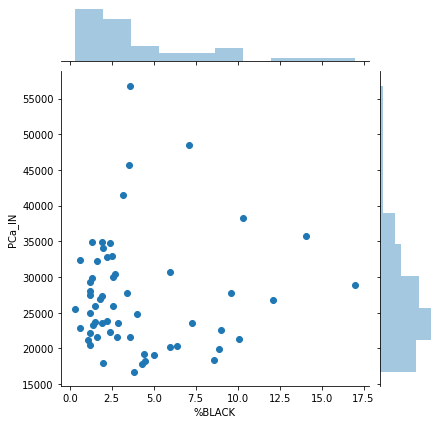

In [25]:
seaborn.jointplot('%BLACK', 
                  'PCa_IN', 
                  data=db, 
                  kind='scatter')

# Discussions
This section discusses differences in data analytics in R and Python.

## Data Storage
Both Python and R can store data in a __dataframe__. The way that Python and R handles such dataframes is a little different. Python relies on the `pandas` package to clean and do other operations with the dataframe. There are other types of data in both R and Python, ranging from arrary(atomic vectors, matrices, and arrays in R, numpy in Python), list to factors and tuples. Python requires more non-built-in pacakge installations to store and deal with data. 

## Spatial Data Storage
__sf__ in R stores spatial data as sf objects, which is a `data.frame` like object with a simple feature list column. This `sf` object is a geospatial geometry with attributes, which could be assembled from `sfg`(geometry) object or `sfc`(geospatial geometry, basically a list of `sfg` objects) objects. \newline
__geopandas__ in Python stores spatial data as `GeoDataSeries` and `GeoDataFrames`, which is similar to the `sfc` and `sfg` obejects to a `sf` object concept in R. In Python language, `GeoDataSeries` is basically the "geo" in `geopands` and `GeoDataFrames` is the "pandas" in `geopandas`. 

## Other Differences
This section will discuss some other differences between data operations in Python and R: \newline
1. __group by__. This functionality in Python is slightly different in syntax compared to in R. In R, all the functionalities are achieved inside the bracket (such as which variables to include and what logic to use (e.g. summation.)) In Python, the syntax will extend outside of the `groupby` bracket and uses "."(dots) to continue the code. This is also a general syntax difference between Python and R (the use of dots in coding.) \newline
2. __`df.merge` vs. `merge`__ In Python, `df.merge` merges the target dataframe onto the current dataframe. In R, `merge` merges the two dataframes together. The way to join in R is sometimes not achieved through a "join" specification, but an "all" specification. \newline
3. __General Syntax__ As mentioned before, a lot of functionalities in Python is achieved through "." whereas in R, it is achieved through many other forms of syntax. In selection variable for plotting, for example, the variable is specified through "." (e.g. `db.HR90`) and some plotting commands are also achieved through dots. (e.g. `db.HR90.plot.hist`). I find this to be more confusing than in R as different categories of fucntionalities are achieved using the same syntax (for example, I find the dollar sign to select variables to be quite a bit clearer than in Python.) The way R selects variables and plots visualizations, however, also might result in longer code.

<center>--This is the end of Lab 4.--</center>